In [93]:
%%writefile app.py
# manpulation
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
# from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from sklearn.compose import ColumnTransformer
# from imblearn.under_sampling import RandomUnderSampler # undersampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling
import streamlit as st

Writing app.py


In [2]:
df = pd.read_csv("C:\mid_project\hotel_booking.csv.zip")
df

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\20114\AppData\Local\Temp\ipykernel_13172\3495722082.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("C:\mid_project\hotel_booking.csv.zip")


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
num_columns = df.select_dtypes(include = 'number')
num_columns

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,NaN,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,NaN,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,NaN,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,NaN,0,104.40,0,0


In [5]:
categorical_columns = df.select_dtypes(include=object).columns
categorical_columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'name', 'email', 'phone-number',
       'credit_card'],
      dtype='object')

In [6]:
# Date features
df['reservation_date'] = pd.to_datetime(df['reservation_status_date'])
df['weekday'] = df['reservation_date'].dt.day_name()
df['arrival_month'] = pd.Categorical(df['arrival_date_month'], categories=[
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
], ordered=True)

# Stay length
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
# Total guests
df['total_guests'] = df['adults']+df['children']+df['babies']


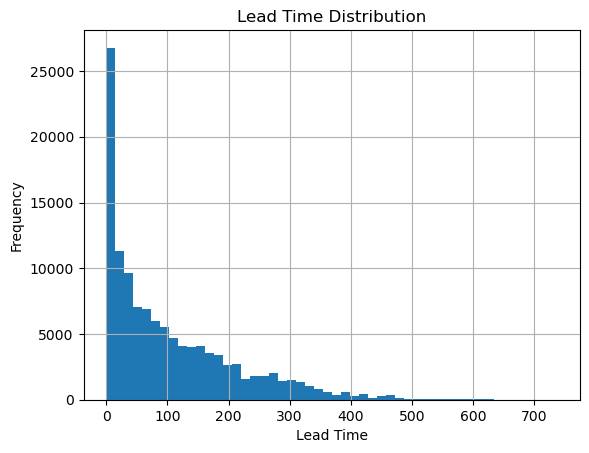

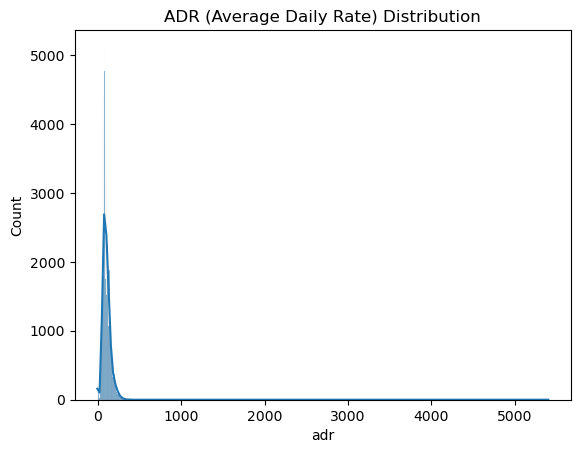

In [7]:
df['lead_time'].hist(bins=50)
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.show()

sns.histplot(df['adr'], kde=True)
plt.title("ADR (Average Daily Rate) Distribution")
plt.show()


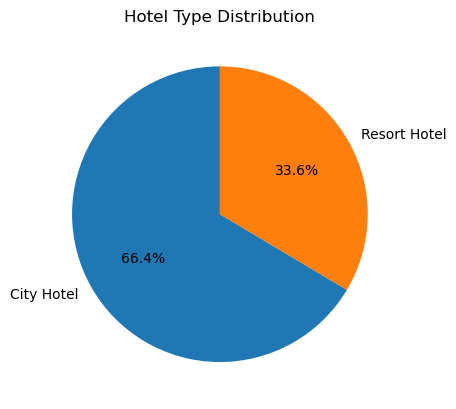

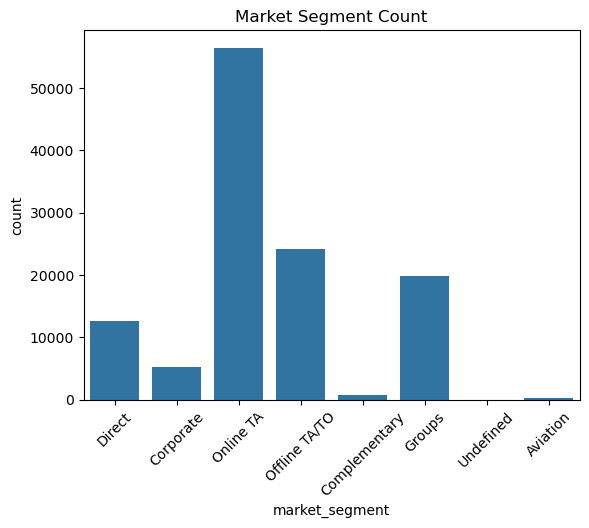

In [8]:
df['hotel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Hotel Type Distribution")
plt.ylabel("")
plt.show()

sns.countplot(x='market_segment', data=df)
plt.title("Market Segment Count")
plt.xticks(rotation=45)
plt.show()


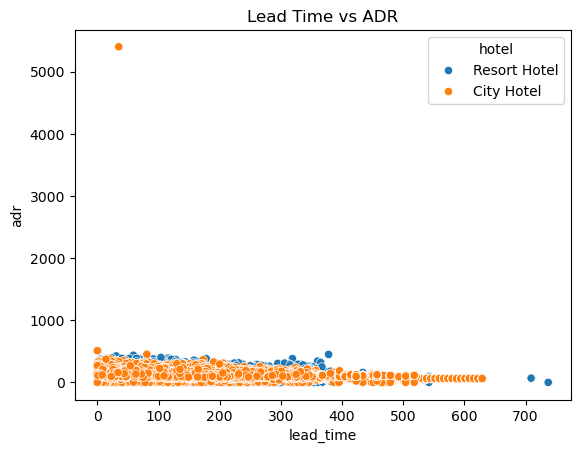

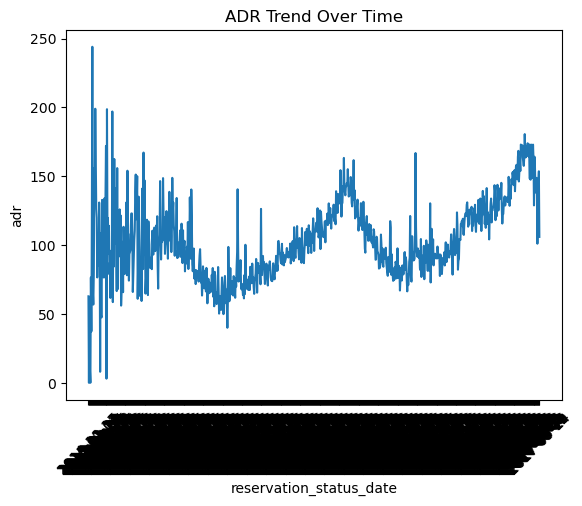

In [9]:
sns.scatterplot(x='lead_time', y='adr', hue='hotel', data=df)
plt.title("Lead Time vs ADR")
plt.show()

df_time = df.groupby('reservation_status_date')['adr'].mean().reset_index()
sns.lineplot(x='reservation_status_date', y='adr', data=df_time)
plt.title("ADR Trend Over Time")
plt.xticks(rotation=45)
plt.show()


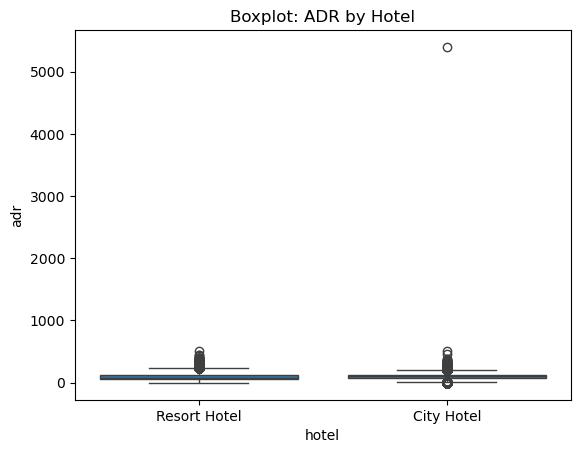

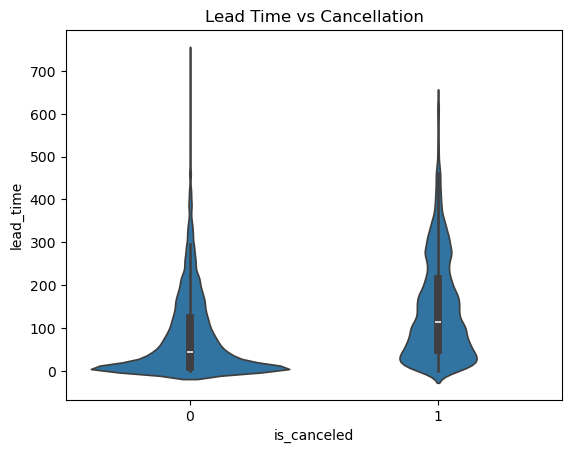

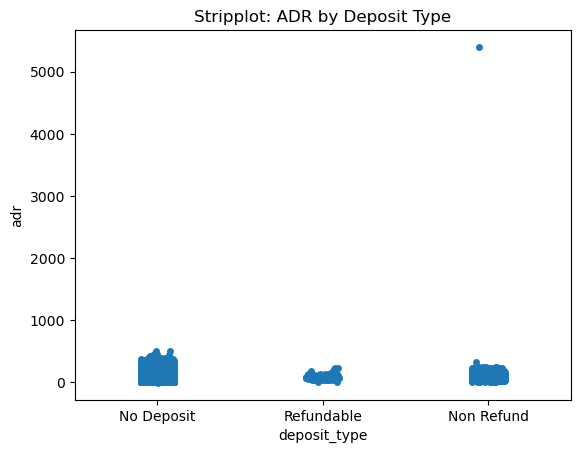

In [10]:
sns.boxplot(x='hotel', y='adr', data=df)
plt.title("Boxplot: ADR by Hotel")
plt.show()

sns.violinplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time vs Cancellation")
plt.show()

sns.stripplot(x='deposit_type', y='adr', data=df, jitter=True)
plt.title("Stripplot: ADR by Deposit Type")
plt.show()


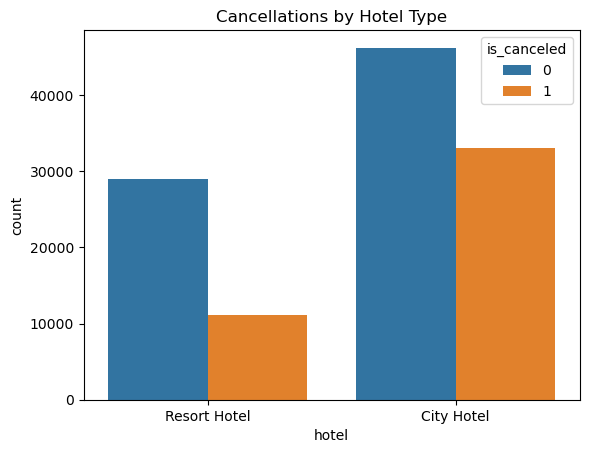

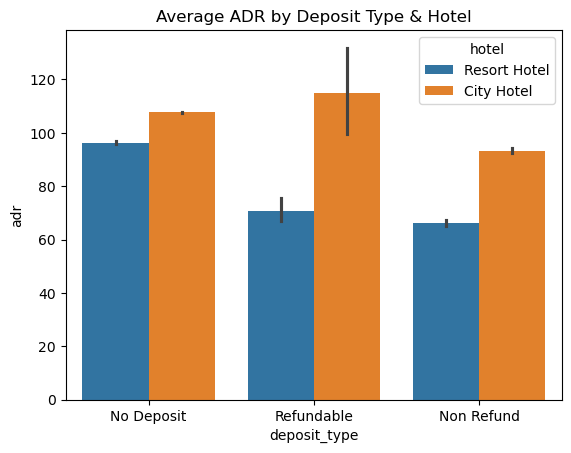

In [11]:
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title("Cancellations by Hotel Type")
plt.show()

sns.barplot(x='deposit_type', y='adr', hue='hotel', data=df)
plt.title("Average ADR by Deposit Type & Hotel")
plt.show()


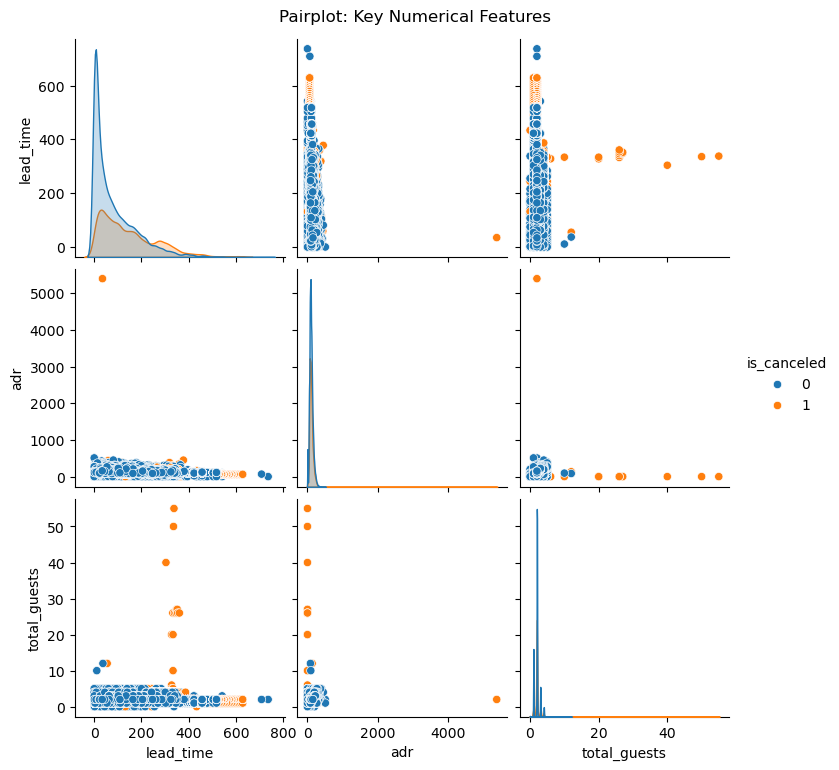

In [12]:
sns.pairplot(df[['lead_time', 'adr', 'total_guests', 'is_canceled']], hue='is_canceled')
plt.suptitle("Pairplot: Key Numerical Features", y=1.02)
plt.show()


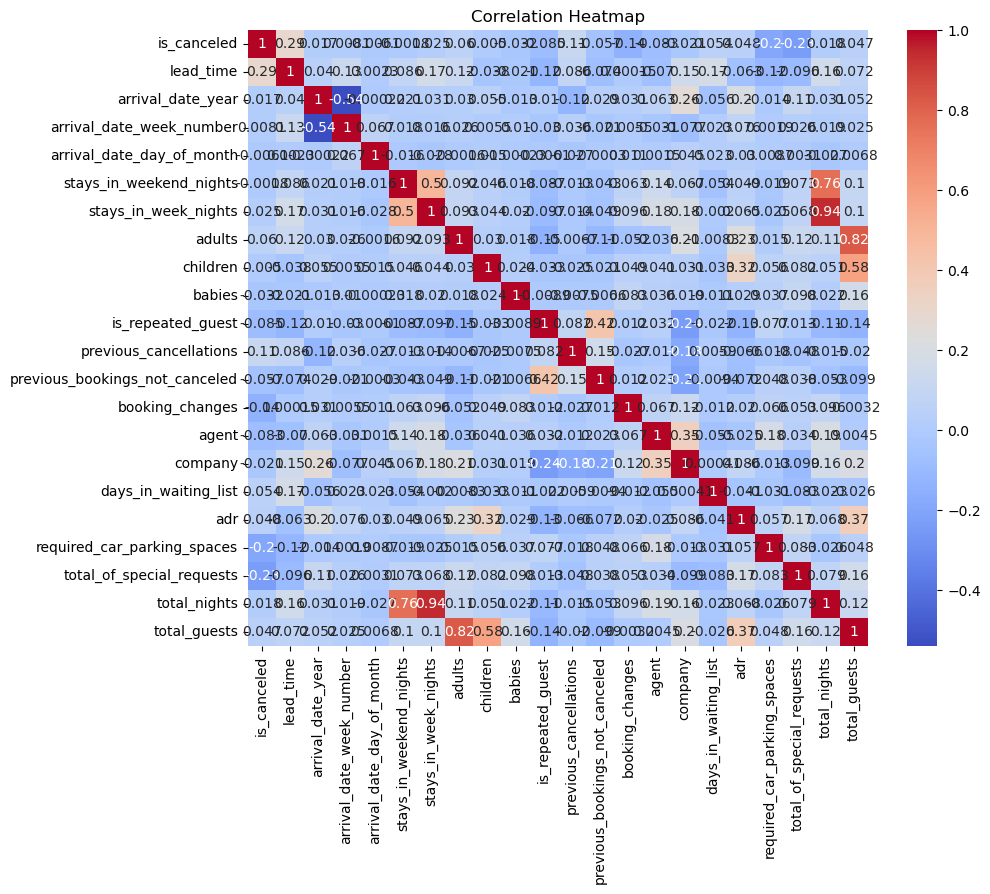

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [30]:
df.isnull().sum()
df.fillna({'children': 0}, inplace=True)
df.dropna(subset=['agent'], inplace=True)

In [ ]:
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
df.duplicated().sum()

0

<Axes: xlabel='adr'>

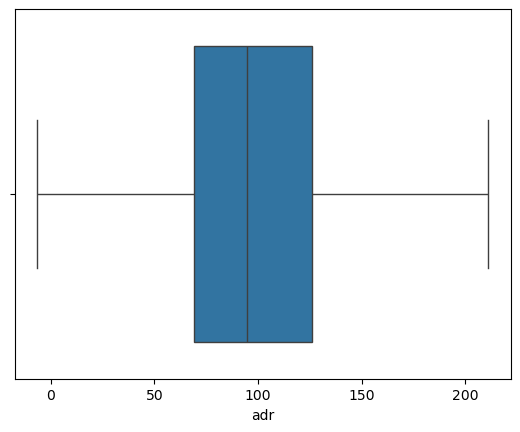

In [29]:
sns.boxplot(x=df['adr'])

In [36]:
df.drop(['reservation_status_date'], axis=1, inplace=True)

cat_features = df.select_dtypes(include='object').columns.tolist()

ordinal_features = []  # e.g., ['customer_rating'] if you had such
nominal_features = list(set(cat_features) - set(ordinal_features))

low_cardinality_nominal = [col for col in nominal_features if df[col].nunique() < 7]
high_cardinality_nominal = [col for col in nominal_features if df[col].nunique() >= 7]

num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features.remove('is_canceled')  # target variable


In [47]:
target = 'is_canceled'

X = df.drop(columns=[target])
y = df[target]

ordinal_features = ['customer_type', 'reservation_status']  # example, customize based on domain knowledge

categorical_features = X.select_dtypes(include='object').columns.tolist()
nominal_features = list(set(categorical_features) - set(ordinal_features))

low_card_nominal = [col for col in nominal_features if X[col].nunique() < 7]
high_card_nominal = [col for col in nominal_features if X[col].nunique() >= 7]

num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features = list(set(num_features) - set([target]))


In [50]:
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
binary_encoder = BinaryEncoder()

scaler = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('ordinal', ordinal_encoder, ordinal_features),
    ('onehot', onehot_encoder, low_card_nominal),
    ('binary', binary_encoder, high_card_nominal),
    ('num', scaler, num_features)
], remainder='drop')


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [106]:
%%writefile app.py
# hotel_booking_app.py

import streamlit as st
import pandas as pd
from datetime import date, timedelta
import os

st.set_page_config(page_title="Hotel Booking", layout="centered")
st.title("🏨 Hotel Booking Form")

# CSV file path
CSV_FILE = "hotel_booking.csv"

# --- Booking Form ---
with st.form("booking_form"):
    st.subheader("Enter your booking details:")

    name = st.text_input("Full Name")
    email = st.text_input("Email Address")
    
    check_in = st.date_input("Check-in Date", min_value=date.today())
    check_out = st.date_input("Check-out Date", min_value=check_in + timedelta(days=1))

    num_guests = st.number_input("Number of Guests", min_value=1, max_value=10, step=1)
    room_type = st.selectbox("Room Type", ["Single", "Double", "Suite", "Deluxe"])

    submitted = st.form_submit_button("Book Now")


Overwriting app.py
